In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from matplotlib.pyplot import figure

Creamos una tabla de 20 puntos en la que cada una de las dos columnas será una coordenada

In [2]:
X = np.random.uniform(0, 20, [30, 2])

In [3]:
X.shape

(30, 2)

Pintamos los puntos con "plt.scatter", en el eje "x" ponemos la primera columna [:, 0], y en el eje "y" ponemos los valores de la segunda columna [:, 1]

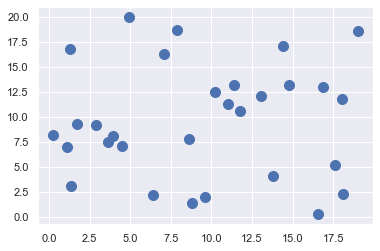

In [4]:
plt.scatter(X[:, 0], X[:, 1], s = 100);

In [5]:
X[np.newaxis, :, :].shape

(1, 30, 2)

La distancia al cuadrado entre dos puntos de puede calcular de la siguiente manera (Según el teorema de Pitágoras):  
D(AB)^2 = X(AB)^2 + Y(AB)^2  
Operando:  
D(AB)^2 = [X(B) - X(A)]^2 + [Y(B) - Y(A)]^2  
Es decir, la distancia al cuadrado es igual al cuadrado de la resta de las coordenadas X de ambos puntos, mas el cuadrado de la resta de las coordenadas Y de cada punto

Creamos una matrix de tres dimensiones 20x20x2:  
X[:, np.newaxis, :] crea un elemento de dimensión 20x1x2  
X[np.newaxis, :, :] crea un elemento de dimensión 1x20x2  
Al restarlos, siguiendo las reglas de "broadcasting" se formará una matriz 20x20x2, y se obtiene una matriz donde cada fila representa las distancias en X e Y de cada uno de los puntos respecto a todos los demás  
Se elevan al cuadrado y se suman, tal y como se ha visto arriba, obteniendo una matriz 20x20  
"axis = -1" implica que se suman los elementos de la coordenada tercera, que eran las coordenadas de cada punto, y al operar se han transformado en los cuadrados de las restas, resultando en la distancia al cuadrado
Obviamente, las distancias de un punto a sí mismo son cero, por lo tanto la diagonal de la matriz resultante será cero

In [6]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)

In [7]:
dist_sq.shape

(30, 30)

In [8]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Al "argpartition" de un array en K + 1 partes, te coge los K + 1 argumentos (Índice o posición en el array) de los números más pequeños y te los pone a la izquierda del array, el resto te los pone a la derecha en el orden que sea  
"nearest_partition" te va a coger los índices de las K distancias más cortas de cada punto  
Se pone K + 1 porque va a incluirse la distancia de un punto a sí mismo, que siempre va a ser cero, y obviamente no cuenta  
"axis = 1" va a hacerlo por filas  

In [9]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

Nota: Cada vez que se ejecuta el código cambian las coordenadas de los puntos, puesto que los he generado aleatoriamente, es decir, los puntos correspondientes a este texto van a cambiar, pero lo dejo así para que se pueda comprender fácilmente  
Por ejemplo, para K = 2, te ha cogido los índices de las 3 distancias más pequeñas, para el primer número son 0, 9 y 19. El 0 es porque es el elemento 0 de la tabla, es decir, la distancia consigo mismo, por tanto no cuenta, y luego tenemos el 6 y el 16, por lo tanto, los puntos más cercanos al punto 1 serán el 10 y el 19 (Hay que recordar que los índices en Python cuentan a partir del 0)  
Para punto número 2 (Segunda fila), tenemos los índices 1, 15 y 19. En este caso, al tratarse del segundo punto, el índice de sí mismo es el 1, y al igual que antes, la distancia de un punto a sí mismo no la tenemos en cuenta, luego quedan los puntos 16 y 20. Puede comprobarse abajo que así es.

In [10]:
nearest_partition[:4]

array([[ 0, 24, 12,  5,  4, 28, 21,  7,  8,  1, 14, 11, 10, 13,  9, 15,
        16, 17, 18, 19, 20,  6, 22, 23,  3, 25, 26, 27,  2, 29],
       [ 7,  1, 21, 29, 18, 10,  3, 28,  4, 12, 24,  0, 11, 13,  9, 15,
        16, 17,  8, 19, 20,  6, 22, 23,  5, 25, 26, 27,  2, 14],
       [ 2, 13, 16, 23,  6, 19, 25,  9, 26, 14,  5, 11, 22,  4,  1, 15,
        27, 17, 21,  0, 20, 18, 12, 10, 24,  8,  7,  3, 28, 29],
       [ 3, 29, 10, 18, 21,  7,  1, 28,  4, 20,  9, 11, 12, 23, 25, 27,
        24,  0, 17, 19, 16, 15, 22, 13,  8,  6, 26,  5,  2, 14]],
      dtype=int64)

Pintamos los puntos en rojo  
Pintamos las líneas en azul, de cada punto a los K puntos más cercanos  
El primer for (i) hace que se itere por todos los puntos, para cada punto:  
- Primero te pinta el número de punto
- Segundo, hace otra iteración con un for (j), donde te coge los índices de los puntos más cercanos de la tabla nearest_partition. De esta forma, i corresponde al índice del punto actual, y cada j corresponde con el índice del punto más cercano. Estos mismos índices, en la tabla X corresponden con las coordenadas de los puntos directamente, de forma que al hacer una línea de X[j] a X[i] se está trazando la línea de cada punto a sus K puntos más cercanos. Esto se hace con *zip(X[j], X[i])

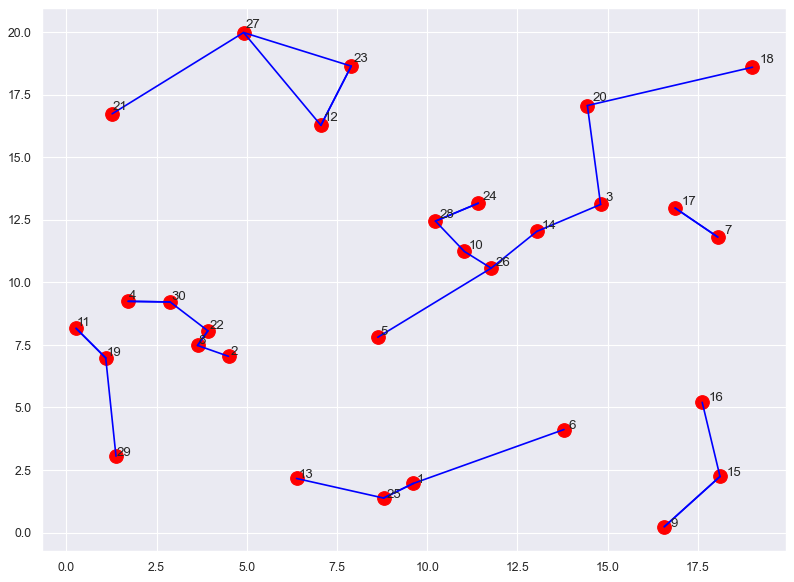

In [14]:
figure(figsize=(12, 9), dpi=80)
plt.scatter(X[:, 0], X[:, 1], s = 150, color = "red")
K = 1
for i in range(X.shape[0]):
    plt.text(X[i, 0] * (1 + 0.01), X[i, 1] * (1 + 0.01) , i + 1, fontsize=12)
    for j in nearest_partition[i, :K + 1]:
        plt.plot(*zip(X[j], X[i]), color = "blue")
    